## Original Dataset 저장

In [1]:
!curl -L "https://app.roboflow.com/ds/5riAj8lkAP?key=YMB58RPCne" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0    998      0 --:--:-- --:--:-- --:--:--   998
100 9747k  100 9747k    0     0  4512k      0  0:00:02  0:00:02 --:--:-- 8281k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/00078_error_dataset_jpeg.rf.17054a9ff0d7884a7c872364e957ba31.jpg  
 extracting: train/images/00105_error_dataset_jpeg.rf.3c3ecb2177161d8d9485f61bbc45246f.jpg  
 extracting: train/images/00137_error_dataset_jpeg.rf.dbb5a2bfc7f273adb08d24733167e4d8.jpg  
 extracting: train/images/00143_error_dataset_jpeg.rf.da1a7d1453aa29f9fdb3d591a0276cbc.jpg  
 extracting: train/images/00148_error_dataset_jpeg.rf.cdffc7947c39075ede41205415a456cd.jpg  
 extracting: train/images/00149_err

In [2]:
import os
os.makedirs('/content/dataset', exist_ok=True)

!mv /content/train /content/dataset/
!mv /content/README.dataset.txt /content/dataset/
!mv /content/README.roboflow.txt /content/dataset/
!mv /content/data.yaml /content/dataset/

In [3]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Under Extrusion', 'spaghetti']

roboflow:
  workspace: synthetic-data-xmyxh
  project: augumentation_original_dataset
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/synthetic-data-xmyxh/augumentation_original_dataset/dataset/3

## Test Dataset 저장

In [4]:
!curl -L "https://app.roboflow.com/ds/ACWuUm93oX?key=V6IoFwhPE5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1966      0 --:--:-- --:--:-- --:--:--  1967
100 5254k  100 5254k    0     0  2186k      0  0:00:02  0:00:02 --:--:-- 5841k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/-2025-05-13-214606_jpg.rf.ab12b5929442bf0d31eb75fd1e63852d.jpg  
 extracting: test/images/04oo7ms9give1_jpeg.rf.be7966e9aaf180c62f3f3c3024b86ac0.jpg  
 extracting: test/images/0tj2v0nriio71_png.rf.e52b32cf5c85a440360f35029dc8de40.jpg  
 extracting: test/images/1st-week-on-a-bambu-lab-a1-wierd-stuff-on-a-18h-v0-8d30klzy5gbc1_png.rf.7e00e87058683d08d2b8984e7d849d86.jpg  
 extracting: test/images/1st-week-on-a-bambu-lab-a1-wierd-stuff-on-a-18h-v0-s1xhxtwy5gbc1_png.rf.91e5efa0

In [5]:
!mv /content/test /content/dataset/test
!mv /content/README.dataset.txt /content/dataset/test
!mv /content/README.roboflow.txt /content/dataset/test
!mv /content/data.yaml /content/dataset/test

### Random Seed 고정

In [6]:
import random
import numpy as np
import torch

def seed_everything(seed: int = 42):
    random.seed(seed)                         # Python random
    np.random.seed(seed)                      # NumPy
    torch.manual_seed(seed)                   # CPU torch
    torch.cuda.manual_seed(seed)              # GPU torch
    torch.cuda.manual_seed_all(seed)          # All GPU (if using multi-GPU)
    torch.backends.cudnn.deterministic = True # Ensure deterministic behavior
    torch.backends.cudnn.benchmark = False    # Turn off optimization that breaks determinism


seed_everything(42)

## data.yaml 파일 정보 수정

1. 데이터셋 개수 확인

In [7]:
%cd /
from glob import glob
img_list = glob('/content/dataset/train/images/*.jpg')
print(len(img_list))

/
200


2. train, test dataset 확인

In [8]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(img_list) + '\n')
  print(len(img_list))

200


2. test 데이터 처리

In [9]:
%cd /
from glob import glob
img_list = glob('/content/dataset/test/images/*.jpg')
print(len(img_list))

/
100


In [10]:
with open('/content/dataset/test.txt', 'w') as f:
  f.write('\n'.join(img_list) + '\n')

In [11]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.SafeLoader)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['Under Extrusion', 'spaghetti'], 'roboflow': {'workspace': 'synthetic-data-xmyxh', 'project': 'augumentation_original_dataset', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/synthetic-data-xmyxh/augumentation_original_dataset/dataset/3'}}


In [12]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/test.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '/content/dataset/train.txt', 'val': '/content/dataset/test.txt', 'test': '../test/images', 'nc': 2, 'names': ['Under Extrusion', 'spaghetti'], 'roboflow': {'workspace': 'synthetic-data-xmyxh', 'project': 'augumentation_original_dataset', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/synthetic-data-xmyxh/augumentation_original_dataset/dataset/3'}}


In [13]:
%cd /content
!git clone https://github.com/WongKinYiu/yolov9.git

/content
Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 781 (delta 265), reused 256 (delta 256), pack-reused 465 (from 1)
Receiving objects: 100% (781/781), 3.25 MiB | 26.01 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [14]:
%cd /content/yolov9/
!pip install -r requirements.txt

/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82

#Data Augmentation을 위한 설치

In [15]:
!pip install albumentations --quiet

## Load Pre-trained weights

In [16]:
os.makedirs('/content/weights', exist_ok=True)

In [17]:
%cd /content/weights/

!wget -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-s.pt
!wget -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-m.pt
!wget -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

/content/weights


## Train and Validate Model


In [18]:
%cd /

!python /content/yolov9/train_dual.py \
--batch 16 \
--epochs 100 \
--optimizer Adam \
--img 640 \
--device 0 \
--min-items 0 \
--close-mosaic 15 \
--data /content/dataset/data.yaml \
--weights /content/weights/yolov9-m.pt \
--cfg /content/yolov9/models/detect/yolov9-m.yaml \
--hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml \
--name yolov9-m-epoch100

/
2025-05-15 18:41:53.896363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747334514.213179    3169 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747334514.299171    3169 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-15 18:41:54.944943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb:

## 학습 결과 확인

In [21]:
!ls content/yolov9/runs/train/yolov9-m-epoch100/

confusion_matrix.png				    results.png
events.out.tfevents.1747334552.ec6817165a0d.3169.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


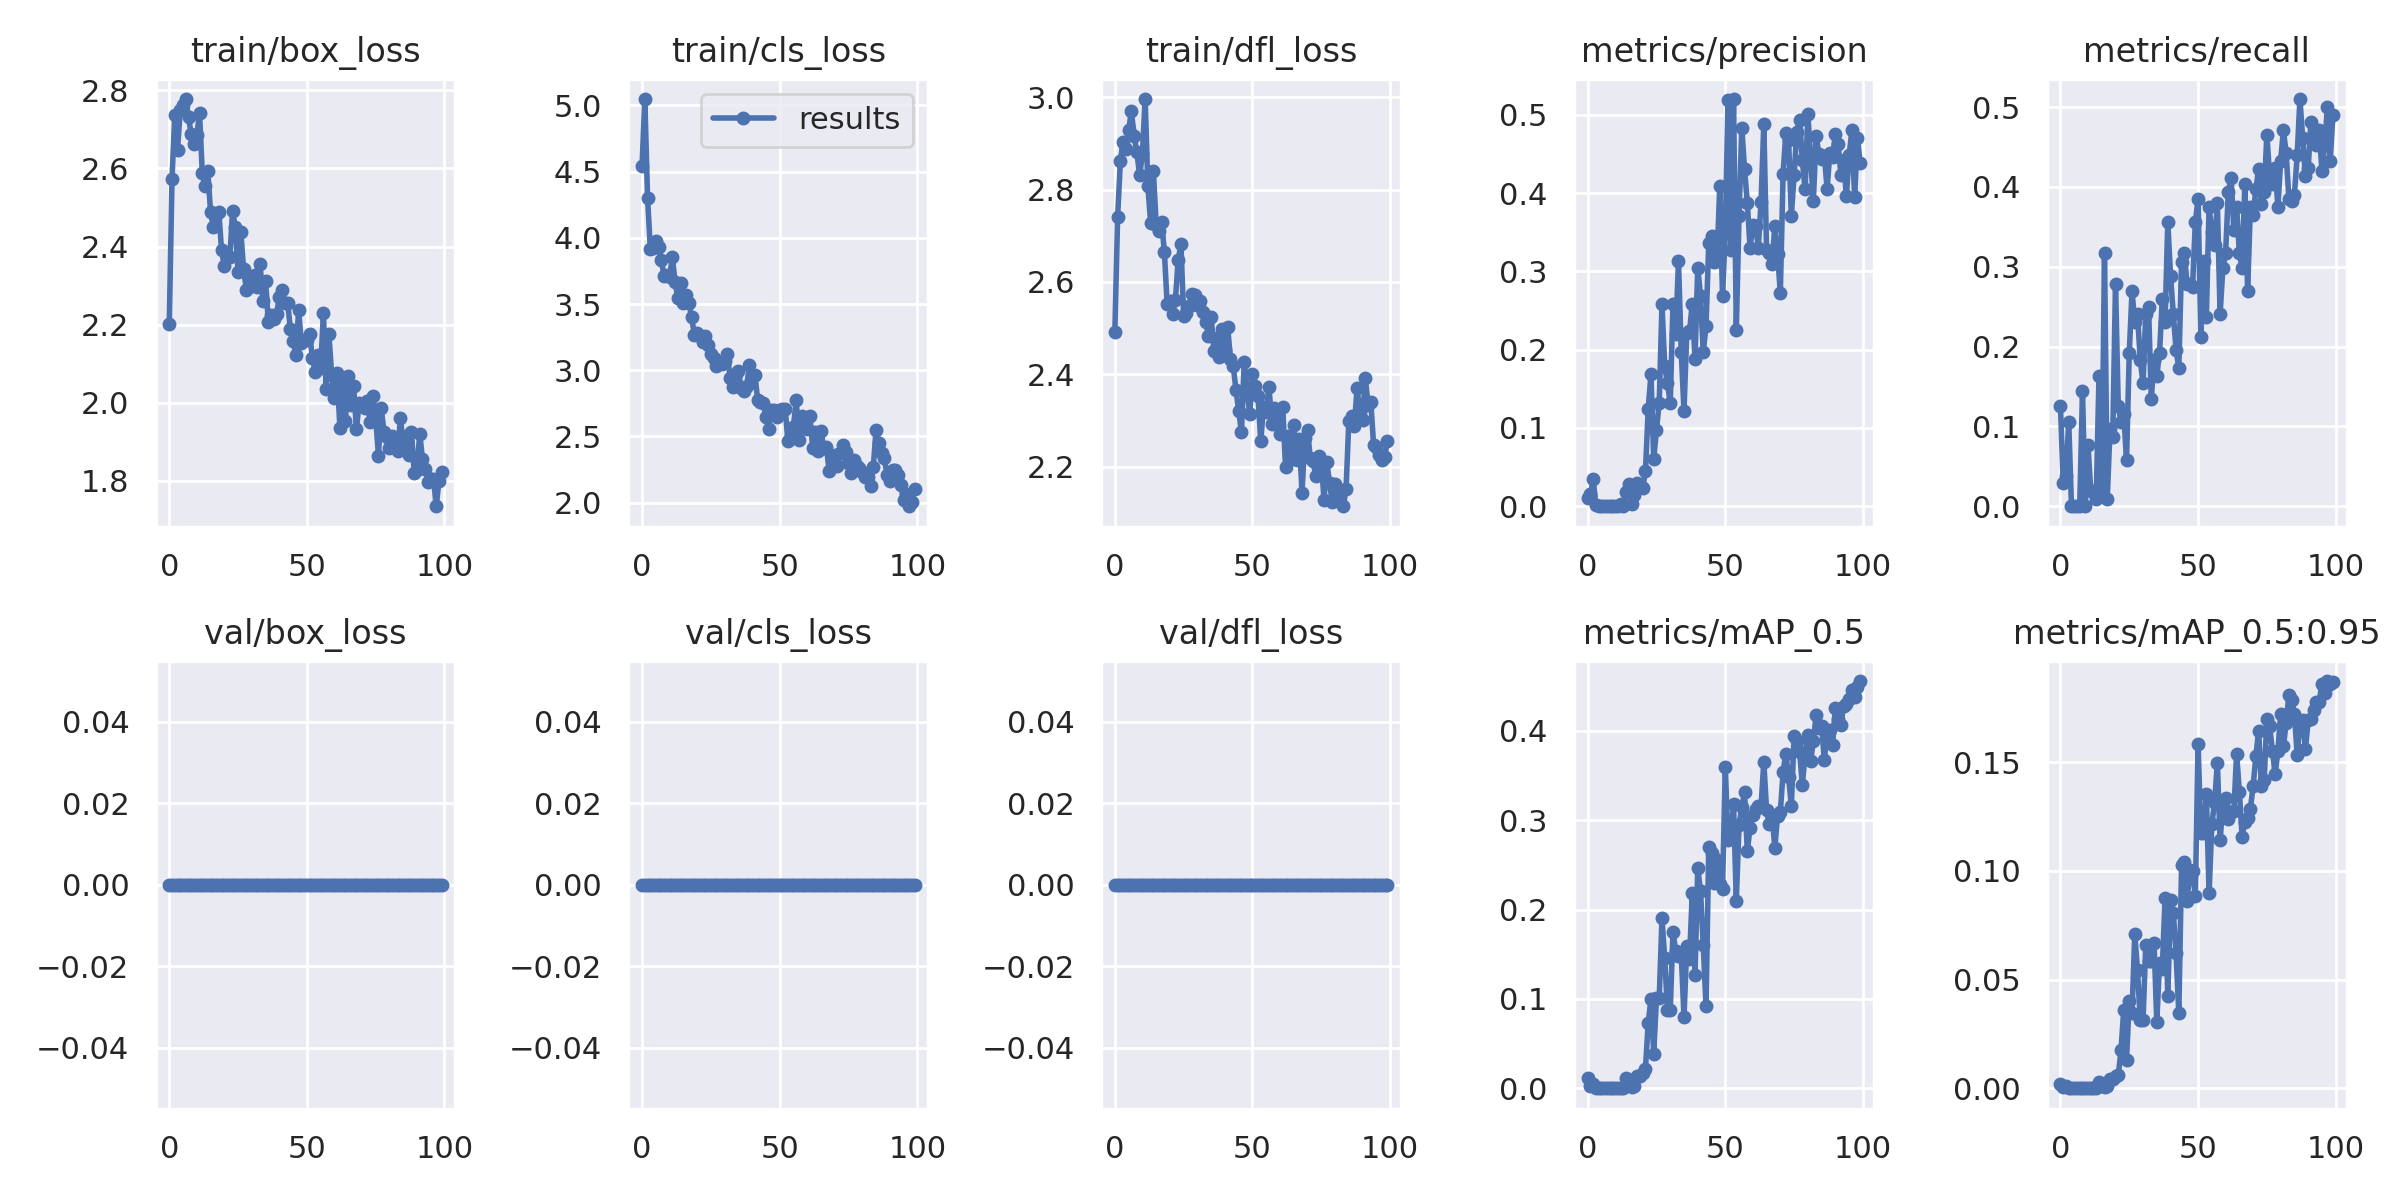

In [22]:
from IPython.display import Image

Image(filename=f"content/yolov9/runs/train/yolov9-m-epoch100/results.png", width=1000)

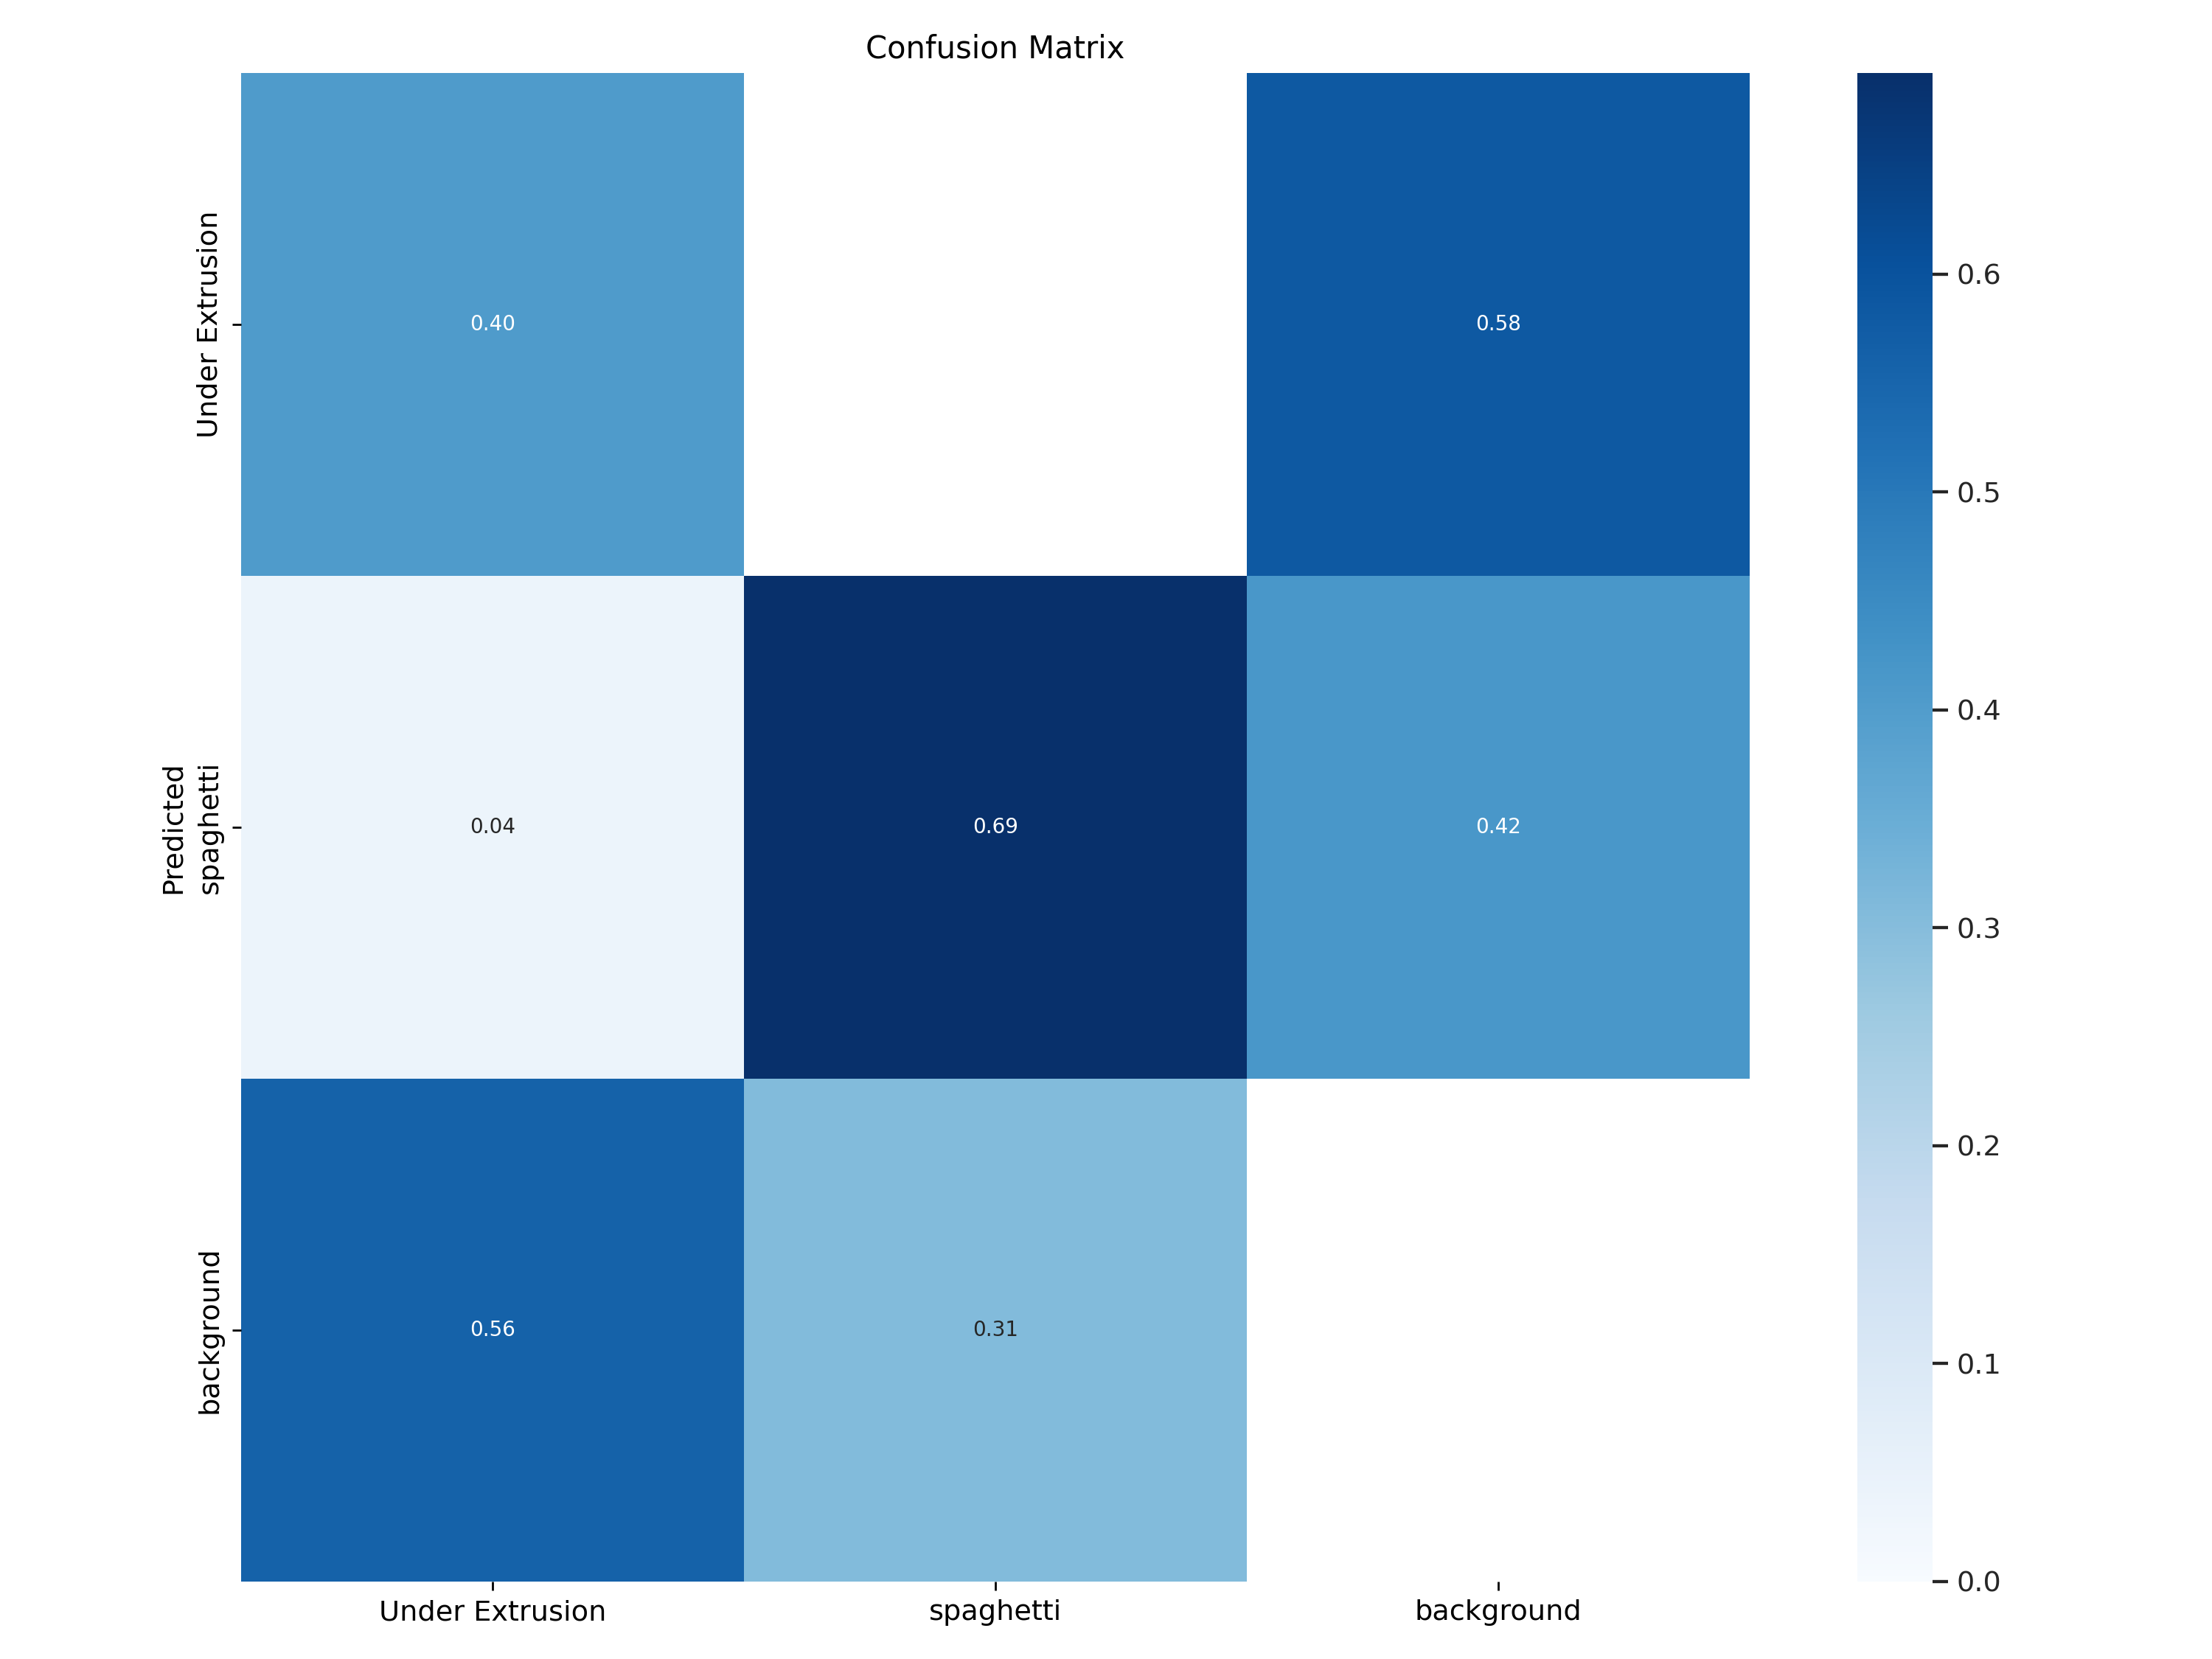

In [23]:
from IPython.display import Image

Image(filename=f"content/yolov9/runs/train/yolov9-m-epoch100/confusion_matrix.png", width=1000)

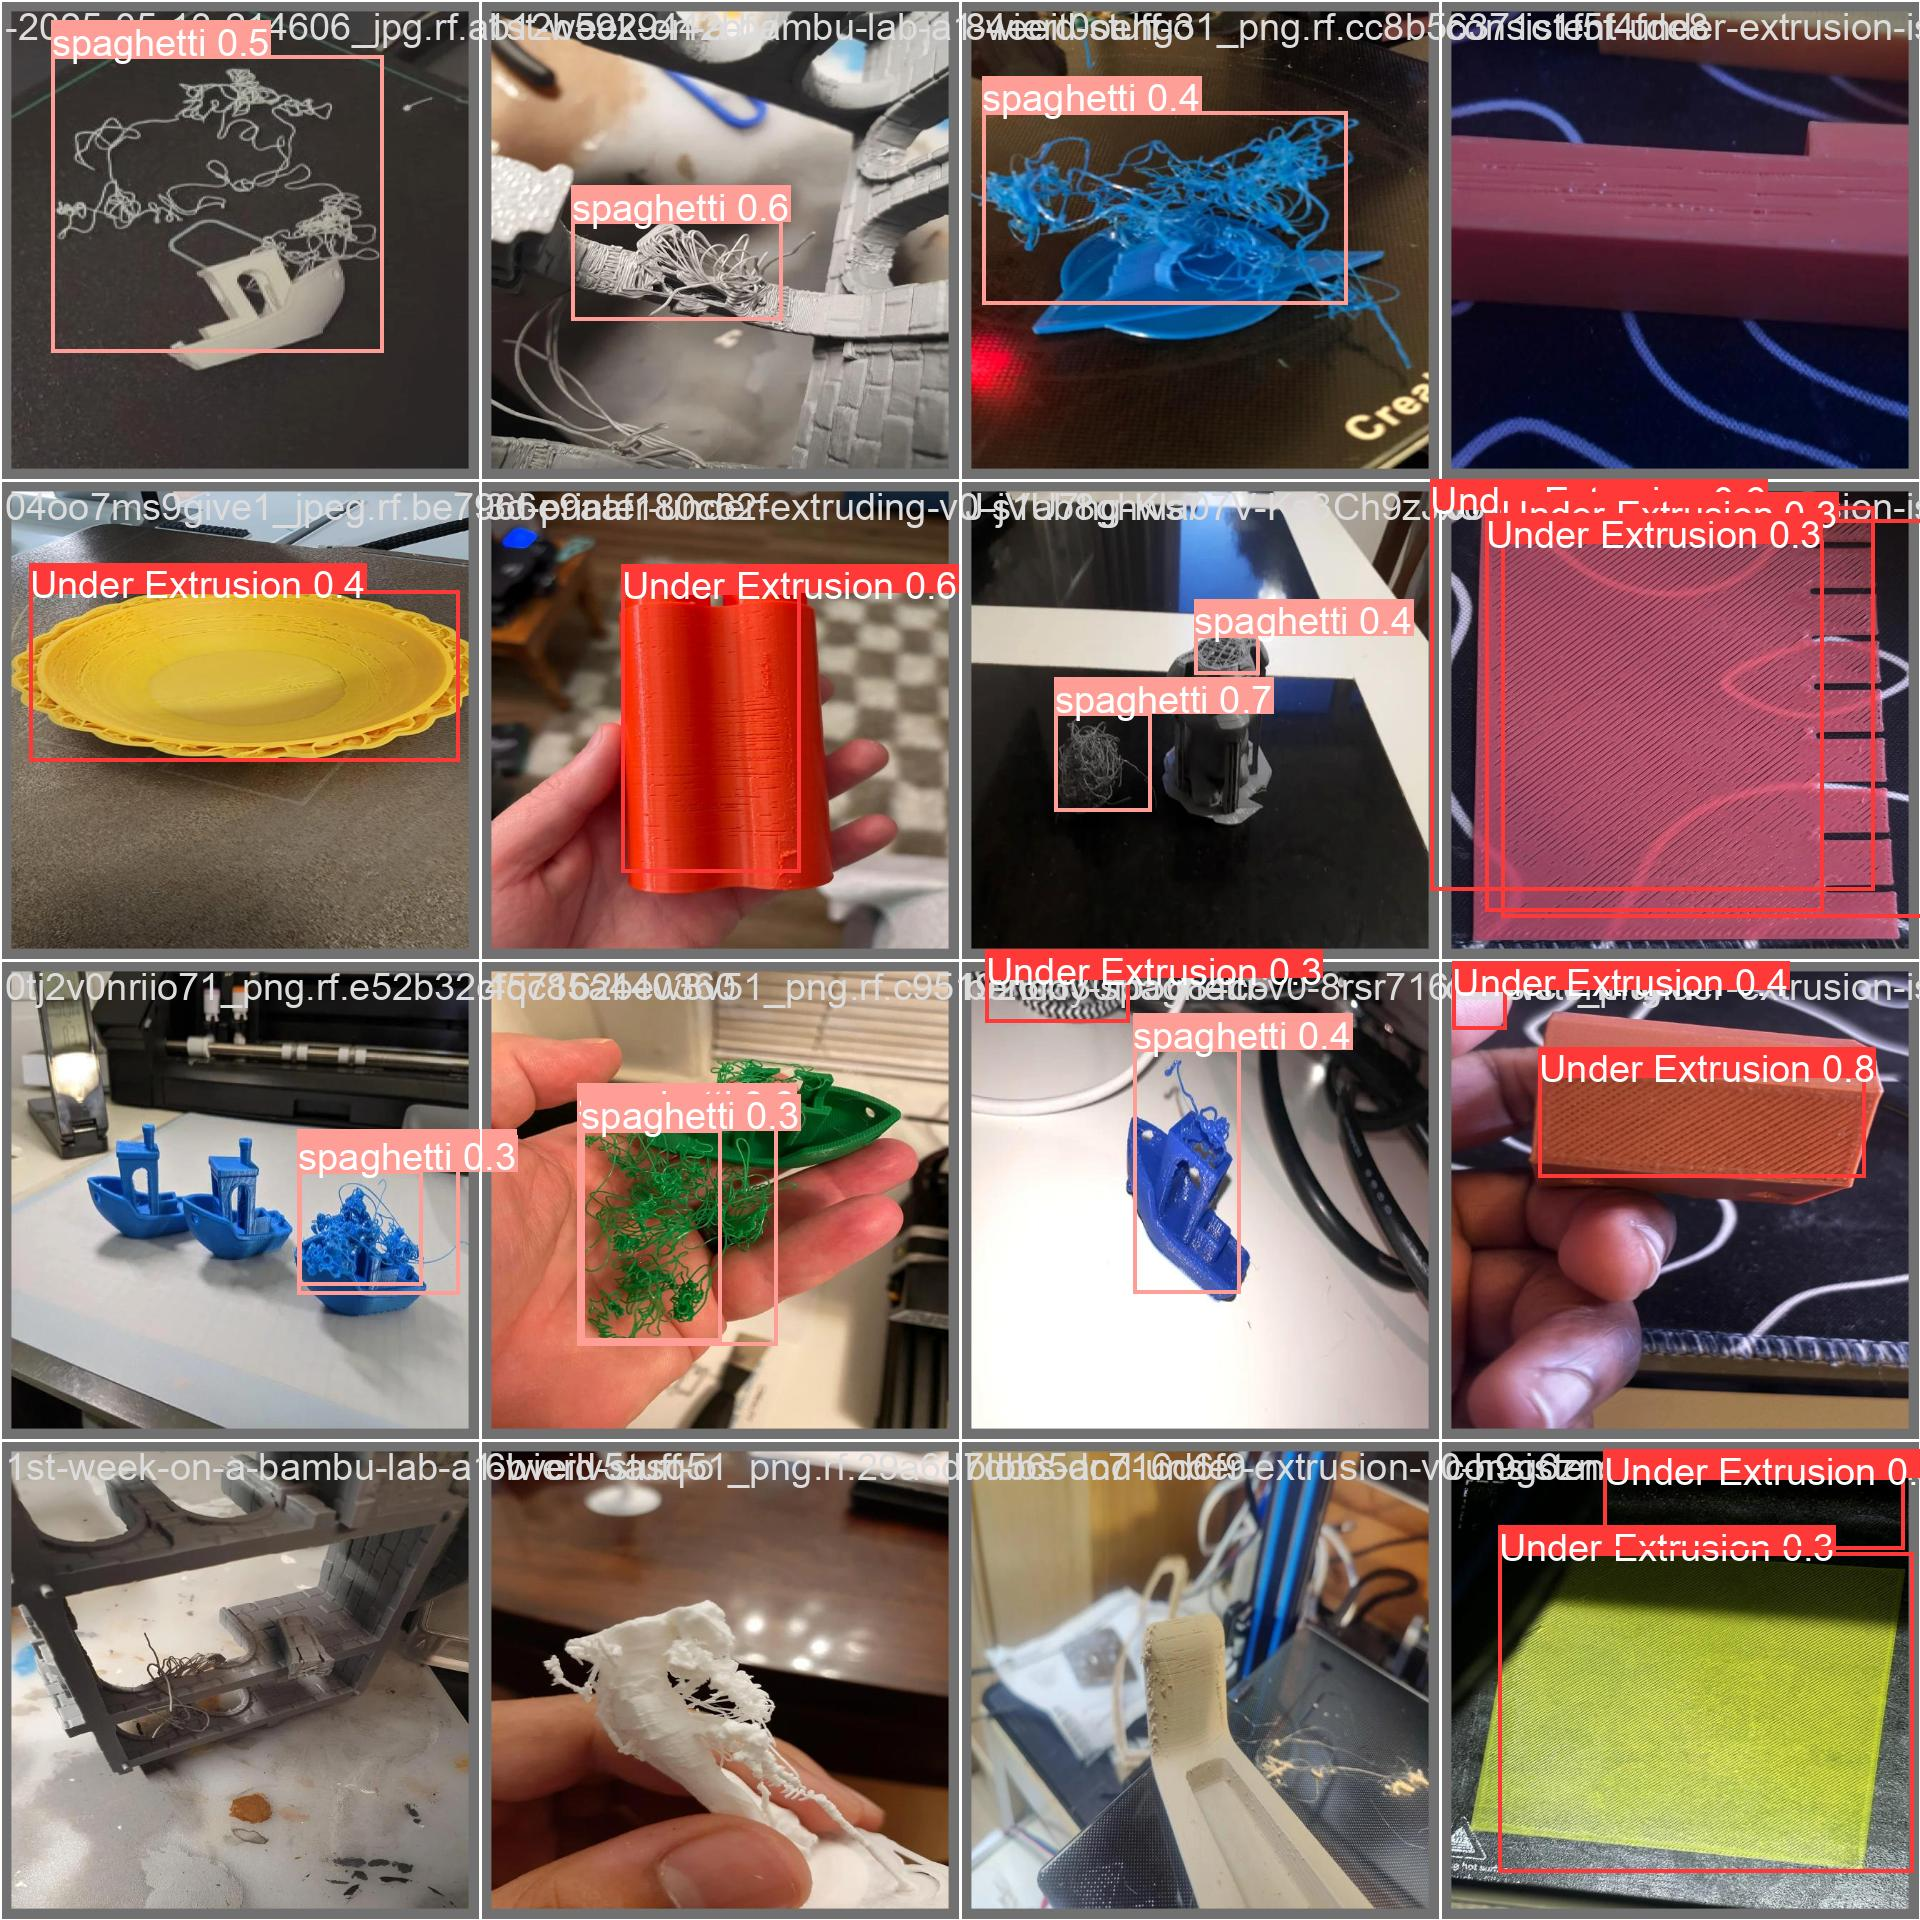

In [24]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/yolov9-m-epoch100/val_batch0_pred.jpg", width=1000)

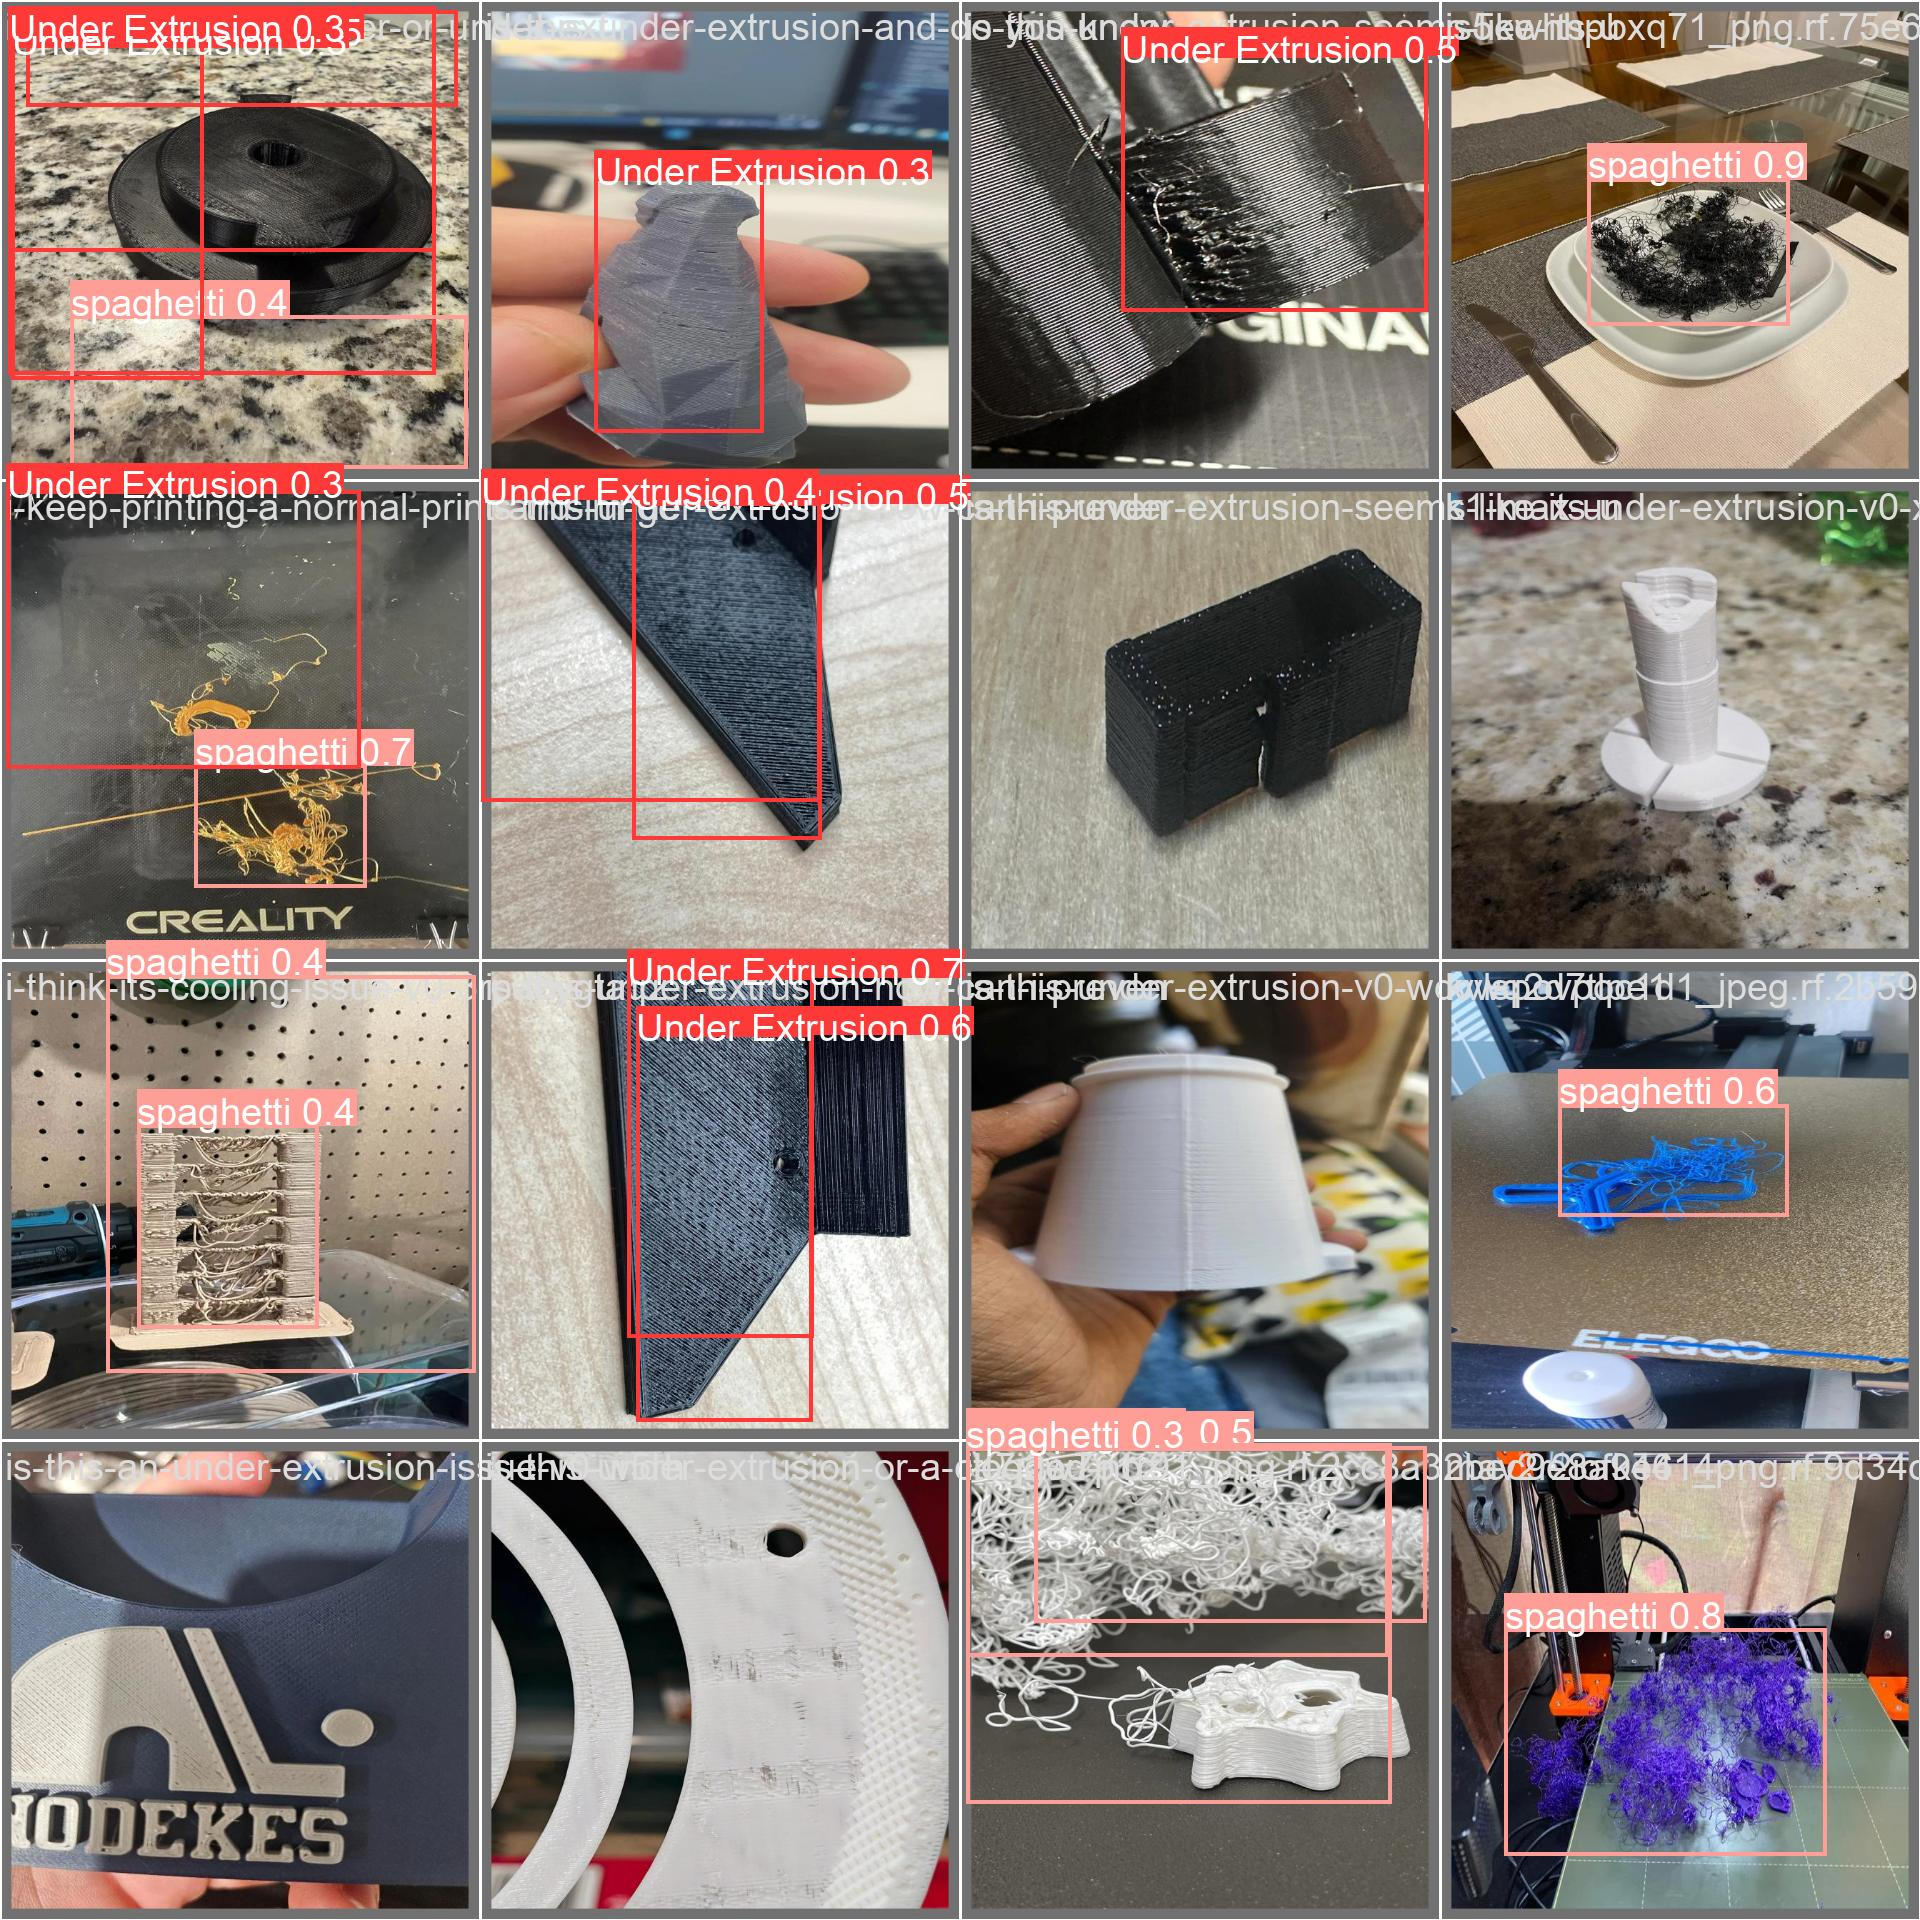

In [25]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/yolov9-m-epoch100/val_batch1_pred.jpg", width=1000)

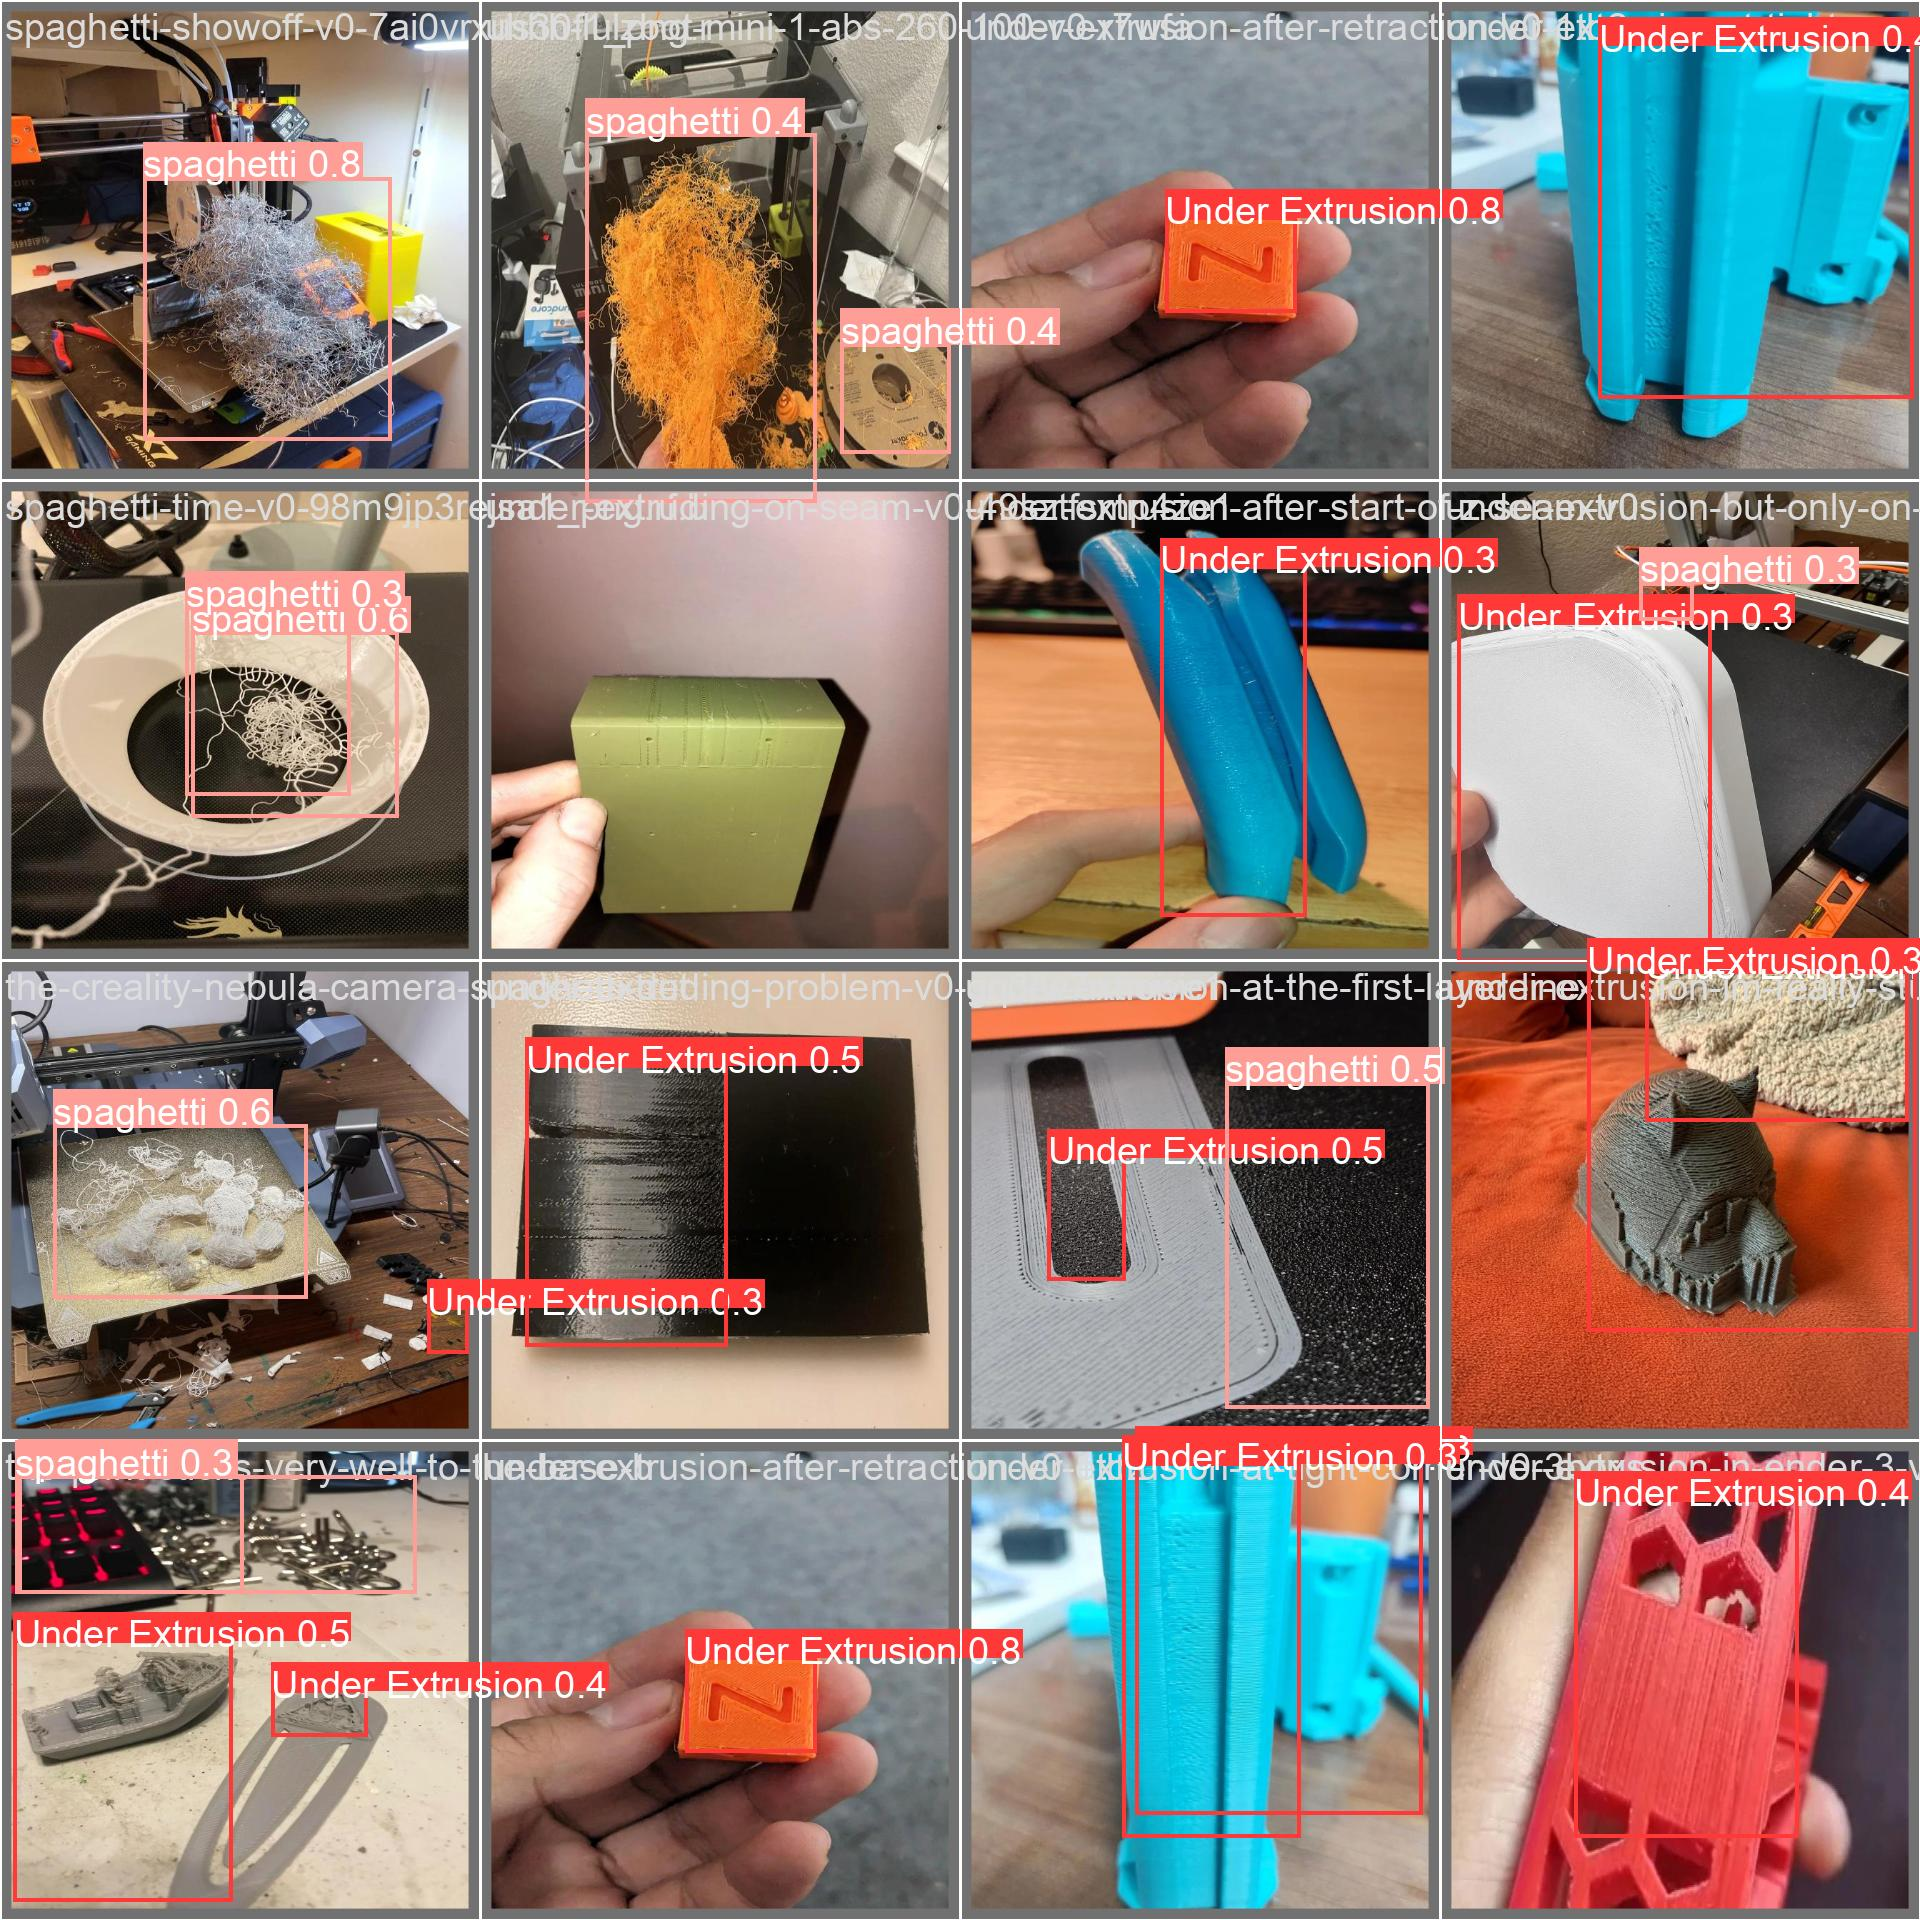

In [26]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/yolov9-m-epoch100/val_batch2_pred.jpg", width=1000)

## Test Model

In [27]:
%cd /

!python /content/yolov9/val_dual.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/dataset/data.yaml \
--weights /content/yolov9/runs/train/yolov9-m-epoch100/weights/best.pt

/
val_dual: data=/content/dataset/data.yaml, weights=['/content/yolov9/runs/train/yolov9-m-epoch100/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=content/yolov9/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov9-m summary: 588 layers, 32554612 parameters, 0 gradients, 130.7 GFLOPs
val: Scanning /content/dataset/test.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:06<00:00,  1.65s/it]
                   all        100        104      0.439       0.49      0.456      0.187
       Under Extrusion        100         52      0.284    

최종 테스트 결과 본인 드라이브로 복사

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
'''테스트 최종 결과를 본인의 구글 드라이브로 복사하는 코드'''
# 현재 결과는 위 로그에서 'Results saved to ~' 뒤에 경로에 저장되어 있고,
# 이 코드는 해당 폴더를 /content/drive/MyDrive/ 로 복사함
# 원하는 위치로 복사하려면 아래 코드에서 cp -r 뒤의 경로들을 직접 수정하면 됨!
# 최종 테스트 결과 경로 ('Results saved to ~' 뒷부분)는 -r 바로 뒤로 변경하면 됩니다!
!cp -r /content/yolov9/runs/val/exp /content/drive/MyDrive/

## Inference Model

이건 실제 이미지 있어야 가능..

In [ ]:
!python /content/yolov9/detect_dual.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/yolov9-m-try13/weights/best.pt \
--source /content/dataset/test/images